In [180]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns

In [181]:
def function_to_plot(data_structure):
    table = tabulate(data_structure, headers='keys', tablefmt='fancy_grid')
    print(table)

### 1 point

In [190]:
data = pd.read_csv("data.csv", header=None)
data.columns = [
    'sex', 
    'length [mm]', 
    'diameter [mm]', 
    'height [mm]', 
    'whole weight [g]', 
    'shucked weight [g]', 
    'viscera weight [g]', 
    'shell weight [g]', 
    'rings'
]
data['sex'] = data['sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

gender_counts = data['sex'].value_counts().reset_index()
gender_counts.columns = ['', 'Count']
gender_counts['Percentage'] = (gender_counts['Count'] / gender_counts['Count'].sum() * 100).round(4)

function_to_plot(gender_counts)

╒════╤════════╤═════════╤══════════════╕
│    │        │   Count │   Percentage │
╞════╪════════╪═════════╪══════════════╡
│  0 │ Male   │    1528 │      36.5813 │
├────┼────────┼─────────┼──────────────┤
│  1 │ Infant │    1342 │      32.1283 │
├────┼────────┼─────────┼──────────────┤
│  2 │ Female │    1307 │      31.2904 │
╘════╧════════╧═════════╧══════════════╛


### 2 point

In [171]:
summary_stats = data.describe().T
summary_stats = summary_stats.drop(columns=['count'])
function_to_plot(summary_stats)

╒════════════════════╤══════════╤═══════════╤════════╤══════════╤═════════╤══════════╤═════════╕
│                    │     mean │       std │    min │      25% │     50% │      75% │     max │
╞════════════════════╪══════════╪═══════════╪════════╪══════════╪═════════╪══════════╪═════════╡
│ length [mm]        │ 0.524009 │ 0.120103  │ 0.075  │ 0.45     │ 0.545   │  0.615   │  0.815  │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ diameter [mm]      │ 0.407892 │ 0.0992495 │ 0.055  │ 0.35     │ 0.425   │  0.48    │  0.65   │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ height [mm]        │ 0.139527 │ 0.0418264 │ 0      │ 0.115    │ 0.14    │  0.165   │  1.13   │
├────────────────────┼──────────┼───────────┼────────┼──────────┼─────────┼──────────┼─────────┤
│ whole weight [g]   │ 0.828818 │ 0.490424  │ 0.002  │ 0.4415   │ 0.79975 │  1.15325 │  2.8255 │
├────────────────────┼────────

### 3 point
there is only one qualitative variable: sex

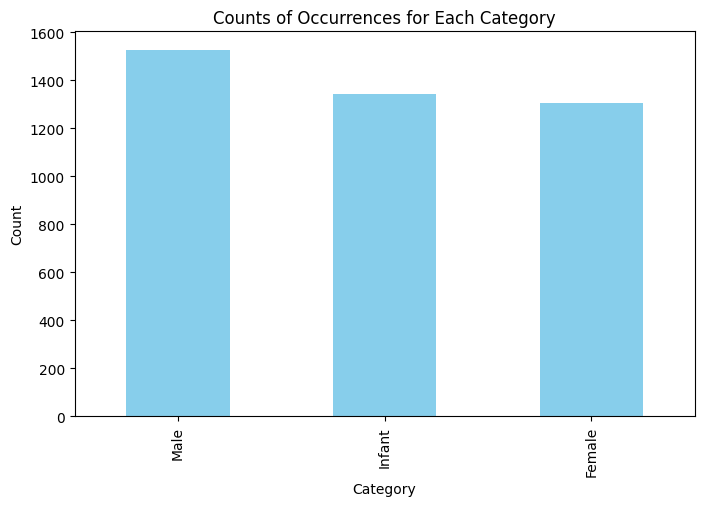

In [172]:
import matplotlib.pyplot as plt

counts = data['sex'].value_counts()

plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Occurrences for Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


### 4 point

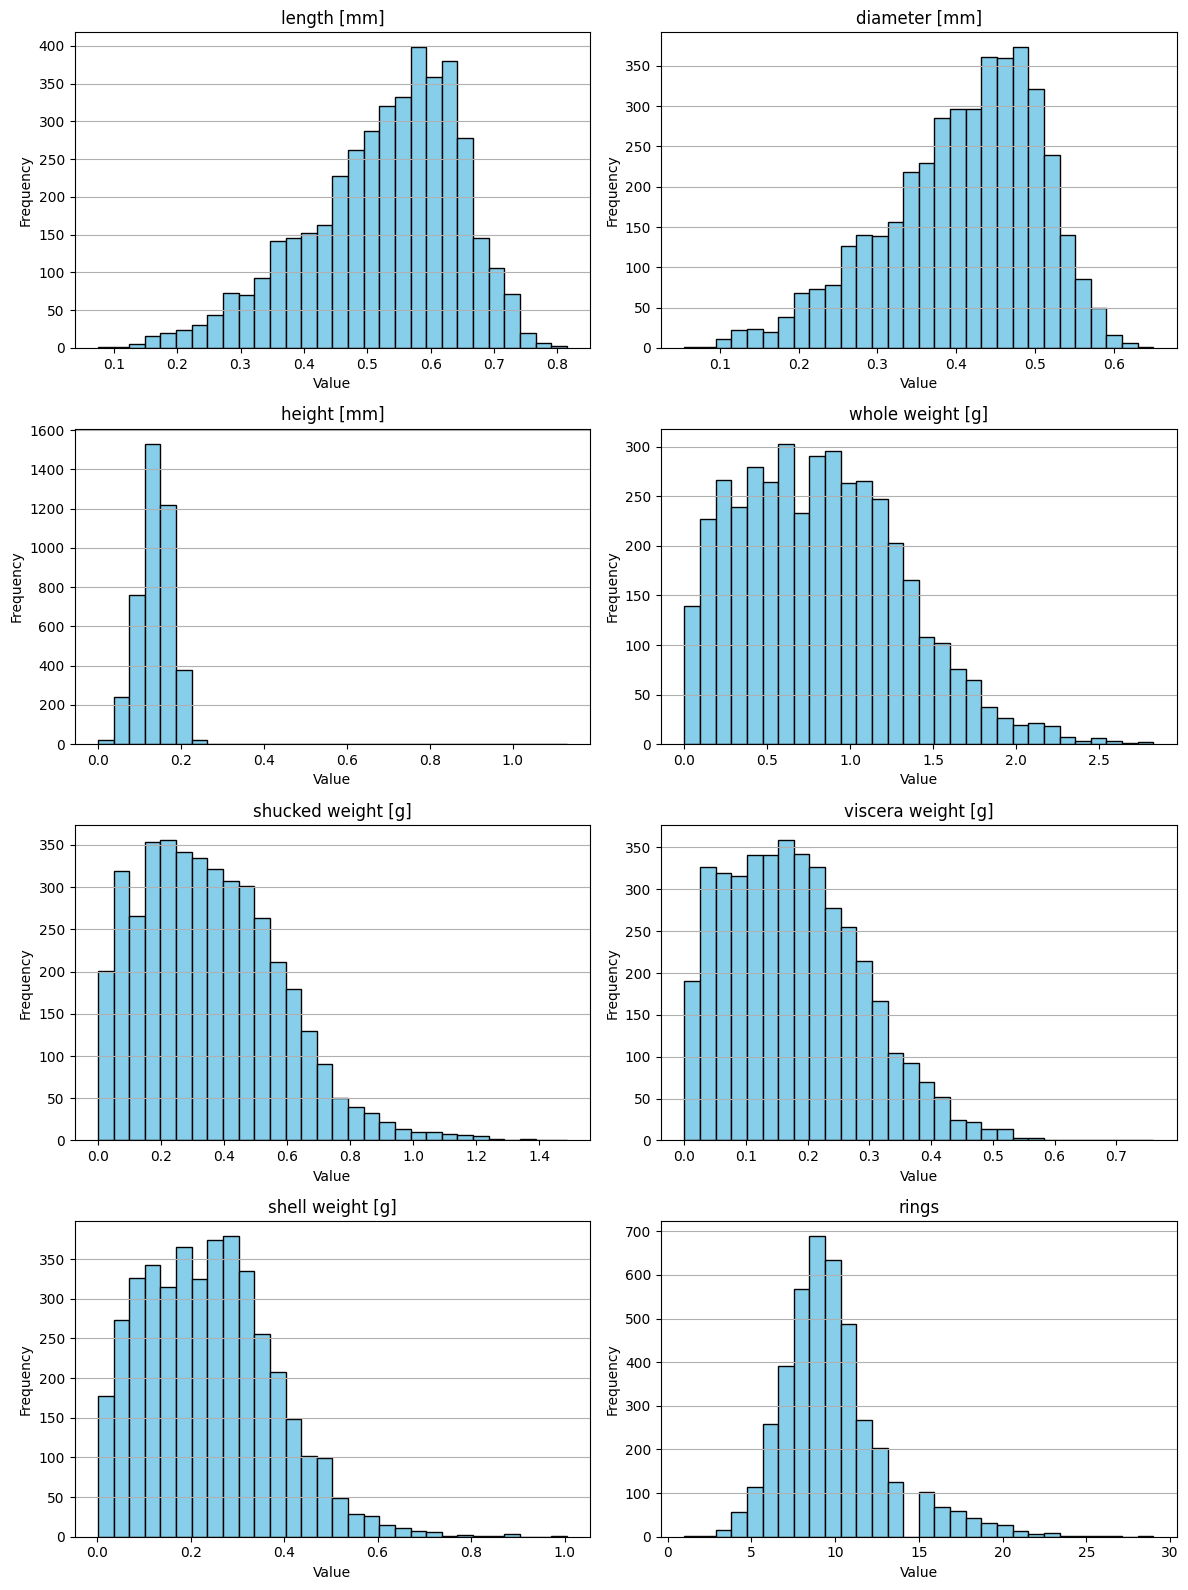

In [173]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
quantitative_variables = data.drop(columns='sex')
for i, var in enumerate(quantitative_variables):
    axes[i].hist(data[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

### 5 point

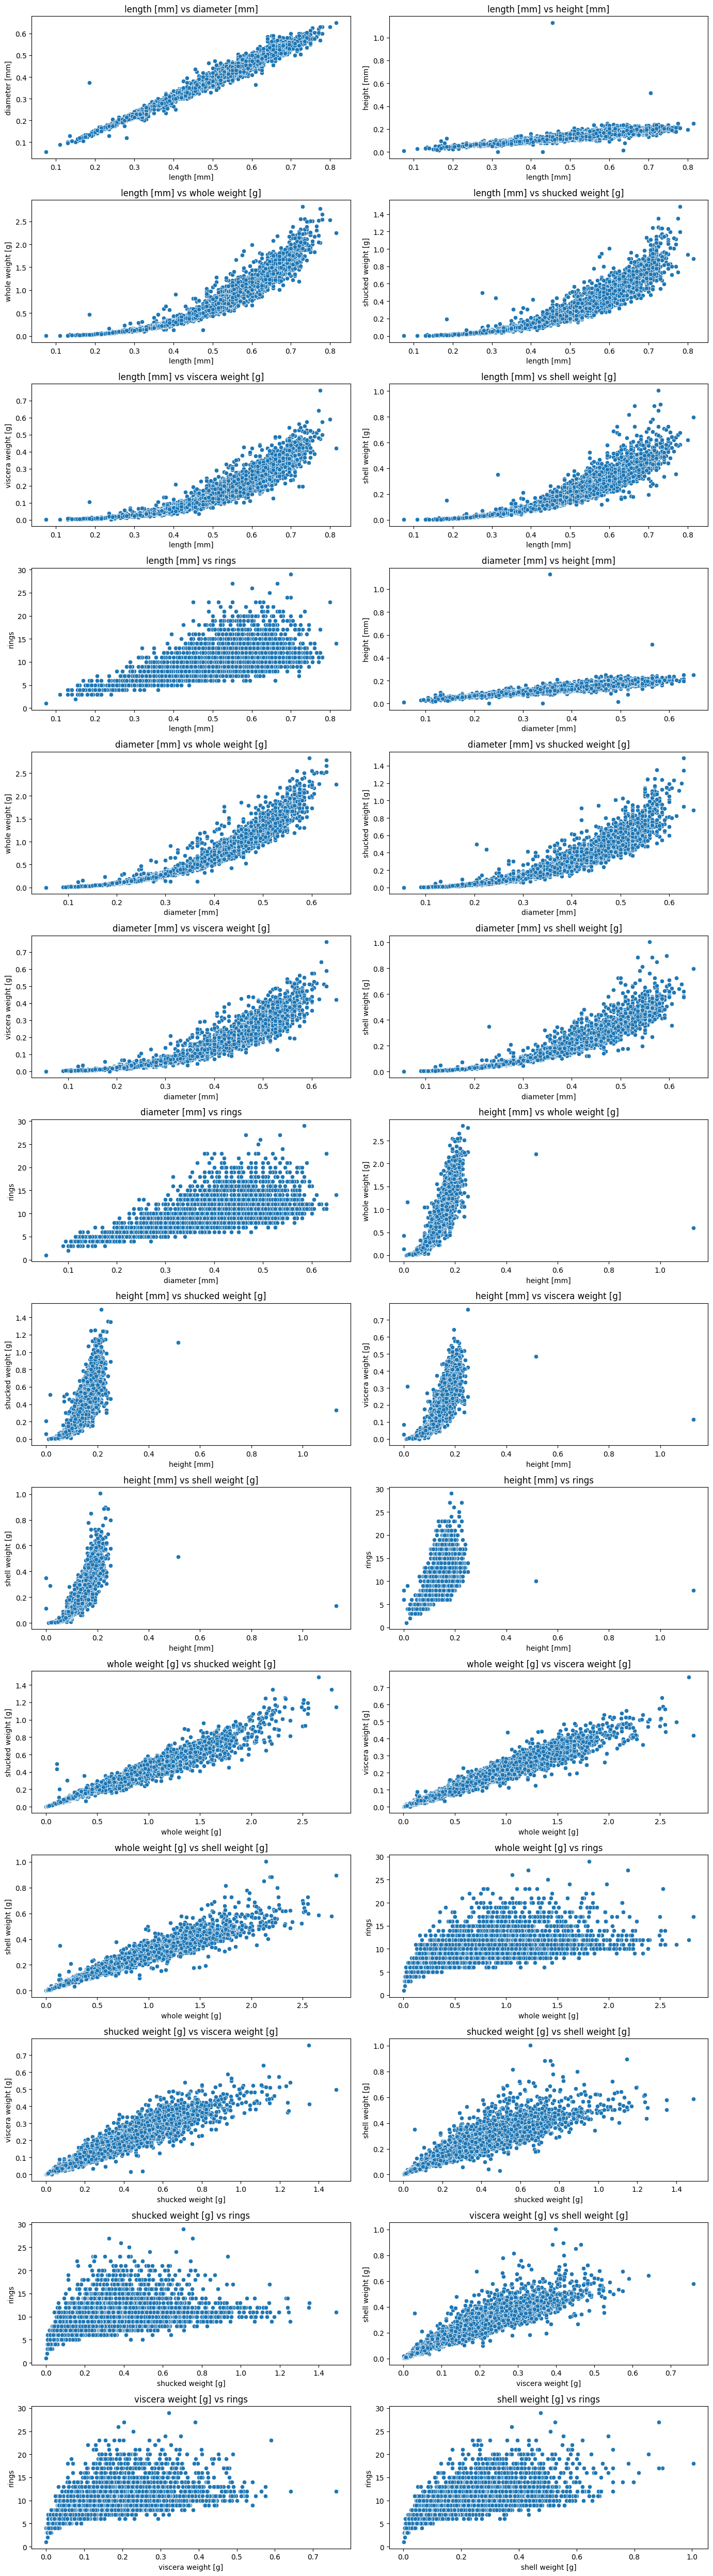

In [174]:
data = data.drop(columns=['sex'])
quantitative_vars = data.columns
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(14, 50)) 
axes = axes.flatten()
plot_index = 0
for i in range(len(quantitative_vars)):
    for j in range(i + 1, len(quantitative_vars)):
        sns.scatterplot(x=data[quantitative_vars[i]], y=data[quantitative_vars[j]], ax=axes[plot_index])
        axes[plot_index].set_title(f'{quantitative_vars[i]} vs {quantitative_vars[j]}')
        plot_index += 1
        if plot_index >= len(axes):
            break
plt.tight_layout()
plt.show()

### 6 point

In [175]:
correlation_matrix = quantitative_variables.corr()
function_to_plot(correlation_matrix)

╒════════════════════╤═══════════════╤═════════════════╤═══════════════╤════════════════════╤══════════════════════╤══════════════════════╤════════════════════╤══════════╕
│                    │   length [mm] │   diameter [mm] │   height [mm] │   whole weight [g] │   shucked weight [g] │   viscera weight [g] │   shell weight [g] │    rings │
╞════════════════════╪═══════════════╪═════════════════╪═══════════════╪════════════════════╪══════════════════════╪══════════════════════╪════════════════════╪══════════╡
│ length [mm]        │      1        │        0.986813 │      0.827552 │           0.925255 │             0.897905 │             0.90301  │           0.897697 │ 0.557123 │
├────────────────────┼───────────────┼─────────────────┼───────────────┼────────────────────┼──────────────────────┼──────────────────────┼────────────────────┼──────────┤
│ diameter [mm]      │      0.986813 │        1        │      0.833705 │           0.925452 │             0.893159 │             0.899726 │ 

### 7 point 

In [176]:
def custom_format(x):
    if x.is_integer(): 
        return f"{int(x)}"
    else:
        return f"{x:.5f}"

C:\Users\Cente\AppData\Local\Temp\ipykernel_16312\753744999.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = correlation_matrix.applymap(custom_format)


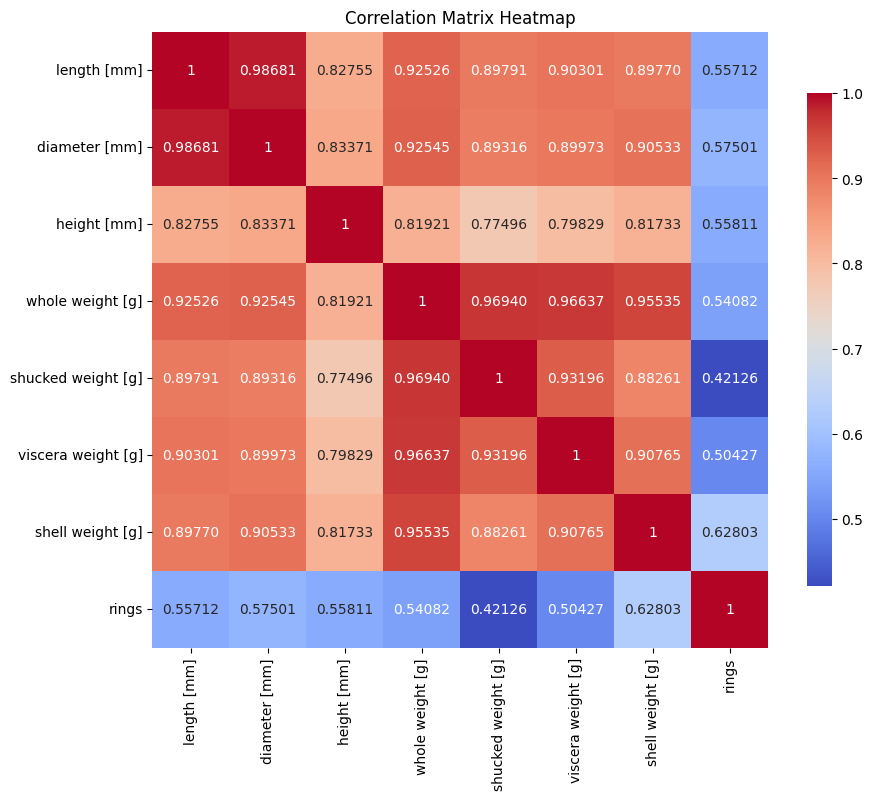

In [177]:
plt.figure(figsize=(10, 8))
annotations = correlation_matrix.applymap(custom_format)
sns.heatmap(
    correlation_matrix,
    annot=annotations,
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    fmt=""
)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

### 8 

Text(0, 0.5, 'diameter [mm]')

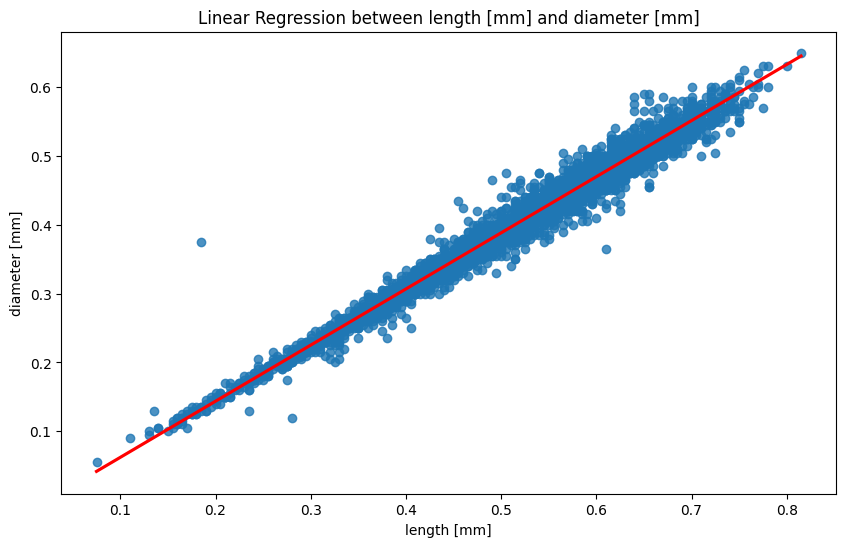

In [178]:
x_variable = "length [mm]"
y_variable = "diameter [mm]"
plt.figure(figsize=(10, 6))
sns.regplot(x=x_variable, y=y_variable, data=data, line_kws = {'color' : 'red'})

# Set the title
plt.title(f'Linear Regression between {x_variable} and {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)